# Intro de la intro de la intro de Redes Neuronales Convolucionales (aka CNN)

___
### __Disclaimer 1:__ `Para evitar cargar el título se omitío 8 veces la palabra intro`
### __Disclaimer 2:__ `Estamos viendo contenido totalmente fuera de libreto ;)`
___

Las Redes CNN (ojo, no estamos hablando del canal de noticias) es una técnica muy poderosa que funciona muy bien para imágenes y datos de texto. Vamos a presentar varios conceptos, así que agarrate fuerte.

La siguiente imagen, es una imagen de un `Red Neuronal Convolucional`, la vamos a descomponer en tres partes:
1. `La/s convolución/es`
2. `El/los submuestreo/s`
3. `La capa lineal ó completamente conectada`}

Además, __[1]__ y __[2]__ forman parte de lo que se conoce como `Extracción de features`. Por su parte __[3]__ forma parte de la `Clasificación.`

__Nota:__ De la siguiente imagen, sólo hemos visto la tercera parte (fully connected).

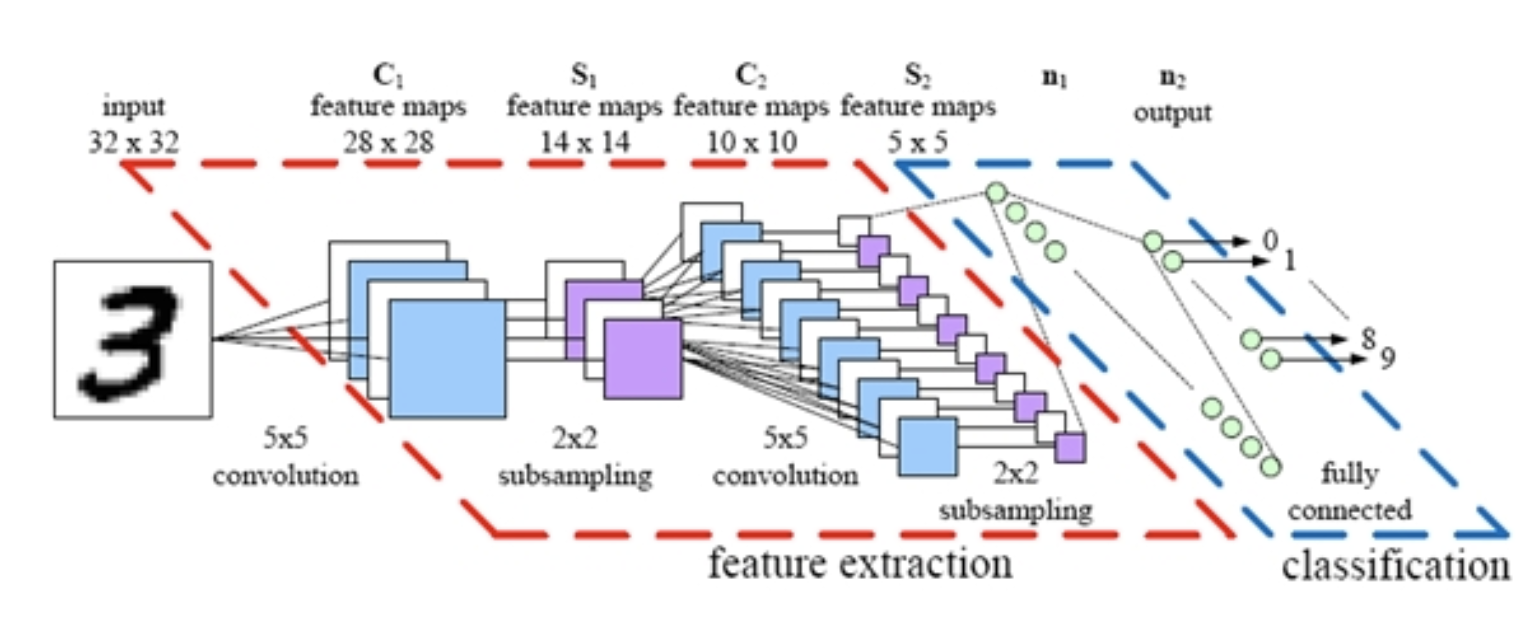

In [2]:
from IPython.display import Image
Image(filename='1cnn.png')

### Empecemos con algunos detalles, aquí entenderemos:
- Convolución
- Canales (profundidad)
- Tamaño de entrada
- Ventana/Filtro

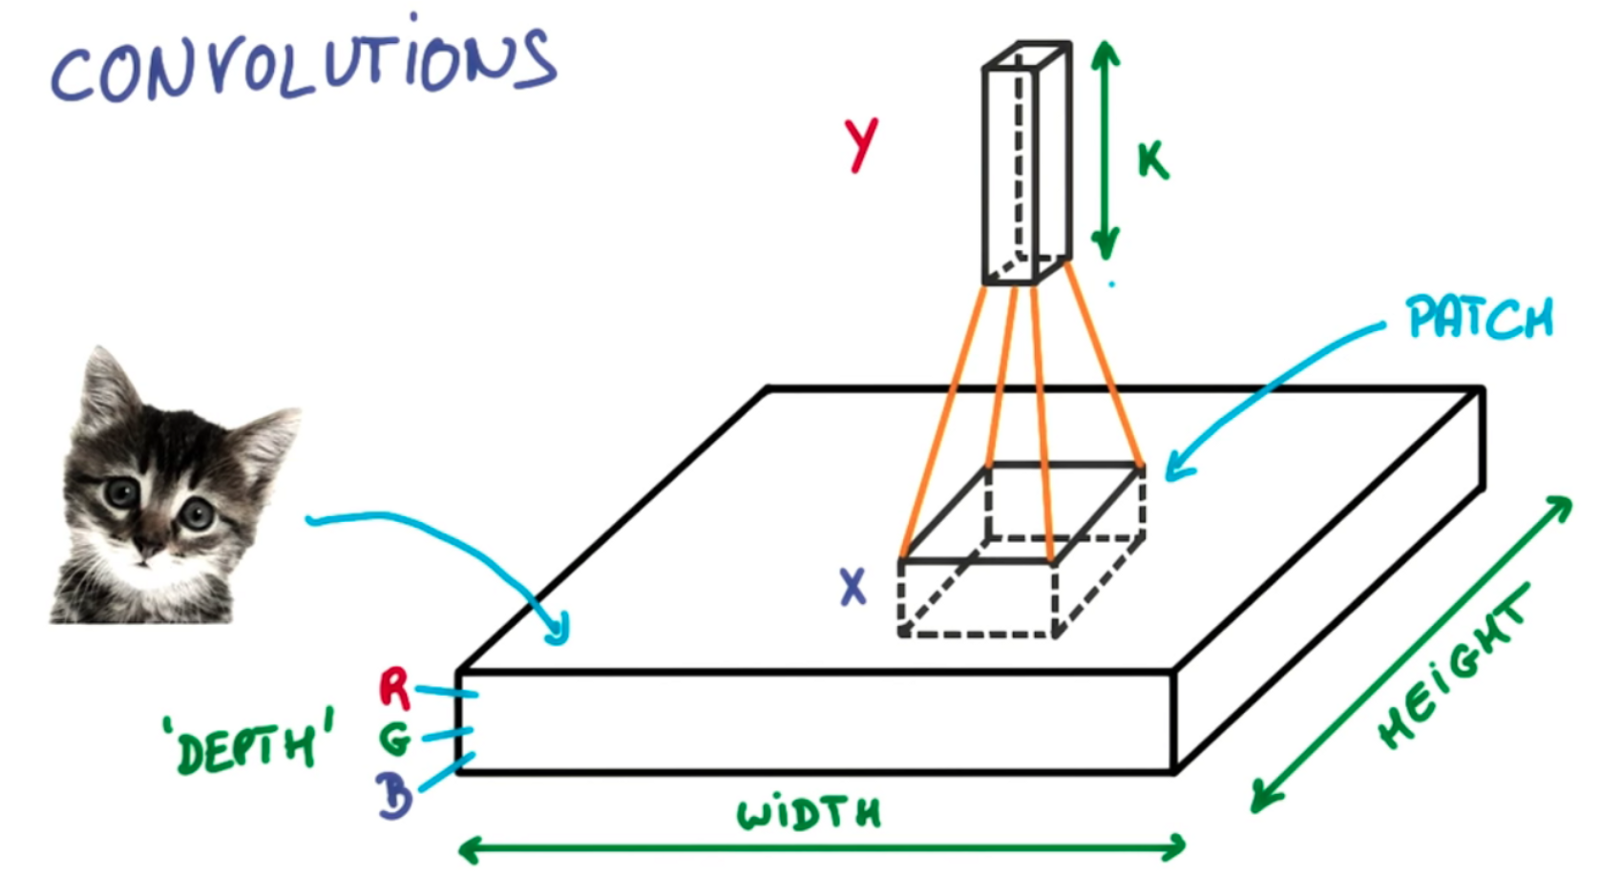

In [3]:
Image(filename='2.cnn.png')

### ¿Qué es una imagen?
Imagina que te dan una imagen de un gatito. Bueno, el gatito con una cara de 'por favor' es en realidad una `matriz de píxeles`. El tamaño de la imagen es el tamaño de píxeles representados por `Ancho x Alto`, lo que a su vez vamos a llamar como `tamaño de nuestra entrada.`

Luego, dependiendo de si capturó una imagen en `blanco y negro` o una imagen en `color`, la imagen se verá diferente (Cuaaac...). Una imagen en `blanco y negro` es básicamente una imagen representada por diferentes tonos de blanco y negro.

Ahora, si la imagen está coloreada, es una combinación de `rojo, azul y verde` (conocido como RGB) para obtener diferentes colores. Bueno, ¿por qué nos importa si es blanco y negro o color? `Nos importa porque dependiendo del tipo de imagen se representa de manera diferente.`

* Una imagen en blanco y negro será una única matriz plana de `n x n` (2D).
* Ahora, si la imagen está coloreada, será una matriz 3D. Es tan simple como tres matrices 2D apiladas una encima de la otra, cada una representando rojo, verde y azul. Las tres capas se llaman `canales` o también conocidas como profundidad.

### Convolución
En una `convolución`, no miramos una imagen como un todo, sino que tomamos una `ventana.` Una ventana es una pequeña porción de la imagen. 

#### ¿Cómo elegimos la pequeña porción? 
Bueno, digamos que básicamente queremos ver solo los primeros `3 x 3` valores de la matriz de `7 x 7`, luego el tamaño de la ventana es `3 x 3.` Esta pequeña ventana se mueve sobre toda la imagen de manera secuencial.

#### ¿Por qué?
Por ahora, solo digamos que lo hace para ver la imagen con `cuidado` (vemos pequeñas partes en detalle). Esta pequeña porción con un tamaño elegido se llama `ventana`. Cada vez que se mueve una ventana, se realizan algunos cálculos para determinar el valor que representa cualquier parte de la imagen. El proceso de mover la ventana secuencialmente sobre toda la imagen se llama `convolución`.

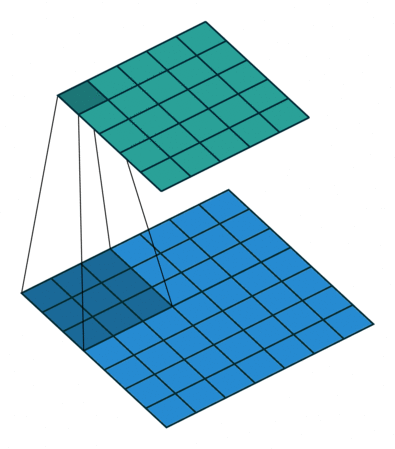

In [4]:
Image(filename='3.cnn.png')

### `El proceso de mover la ventana secuencialmente sobre toda la imagen se llama convolución. Pero mientras nos movemos, ¿cuánto nos movemos? ¿Podemos movernos adyacentes u omitir uno y mover dos adyacentes?` 

La cantidad de píxeles a mover se define mediante un valor llamado `stride.` Volvamos a los conceptos anteriores.

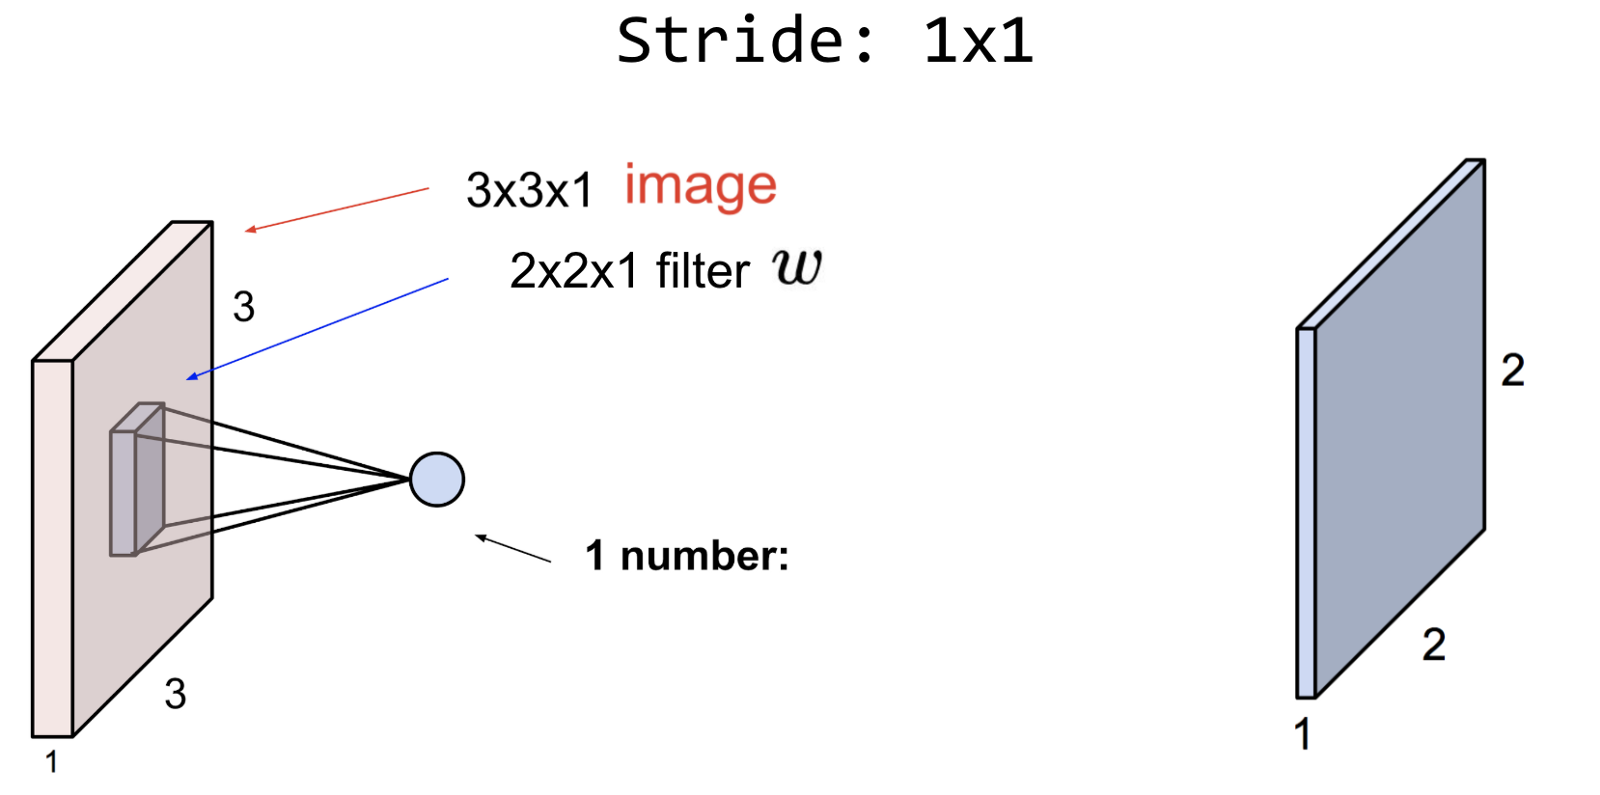

In [5]:
Image(filename='4.cnn.png')

Digamos que tenemos un `stride=1`. La imagen para simplificar se compone de `3 x 3` píxeles como se muestra arriba en el cuadro de la izquierda. La imagen está en `blanco y negro`, por lo que la `profundidad es 1` en el caso anterior. Por lo tanto el `tamaño de entrada` de nuestra imagen es `3 x 3 x 1` y la ventana de `2 x 2 x 1.`

### ¿Por qué? 
Decidimos al azar mirar solo los primeros 4 píxeles de los 9 píxeles de la imagen, es decir, `2 x 2` píxeles a la vez. La ventana también se denomina `Filtro` en la terminología de CNN.

Digamos que cuando vemos la primera ventana de `2 x 2`, calculamos un número que representa a `2 x 2` parte de una imagen, este número se anota y avanzamos paso a paso. Luego calculamos otro número hasta que pasamos al final. Los números que anotamos se verán como el cuadro de la izquierda y la matriz será de tamaño `2 x 2.`

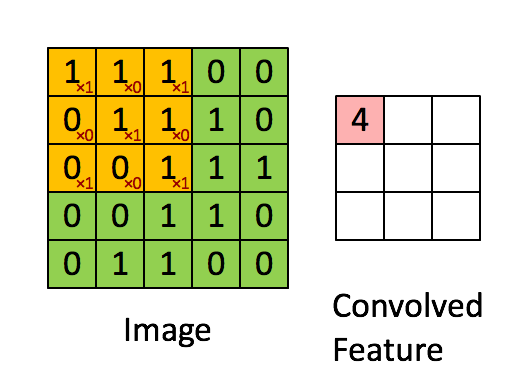

In [6]:
Image(filename='5.cnn.png')

### Padding
Supongamos que usamos una ventana de `2 x 2`, cada número excepto los números de esquina se ven en la ventana al menos dos veces ¿verdad? así que estamos perdiendo información al ver los números de las esquinas solo una vez. ¿Qué tal agregar ceros al final para que podamos mover la ventana y ver cada número exactamente dos veces? La adición de ceros se llama `padding.`

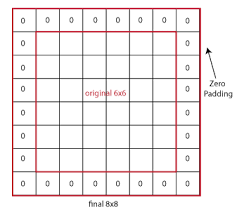

In [7]:
Image(filename='6.cnn.png')

Así se verá moverse a través de la imagen con padding.

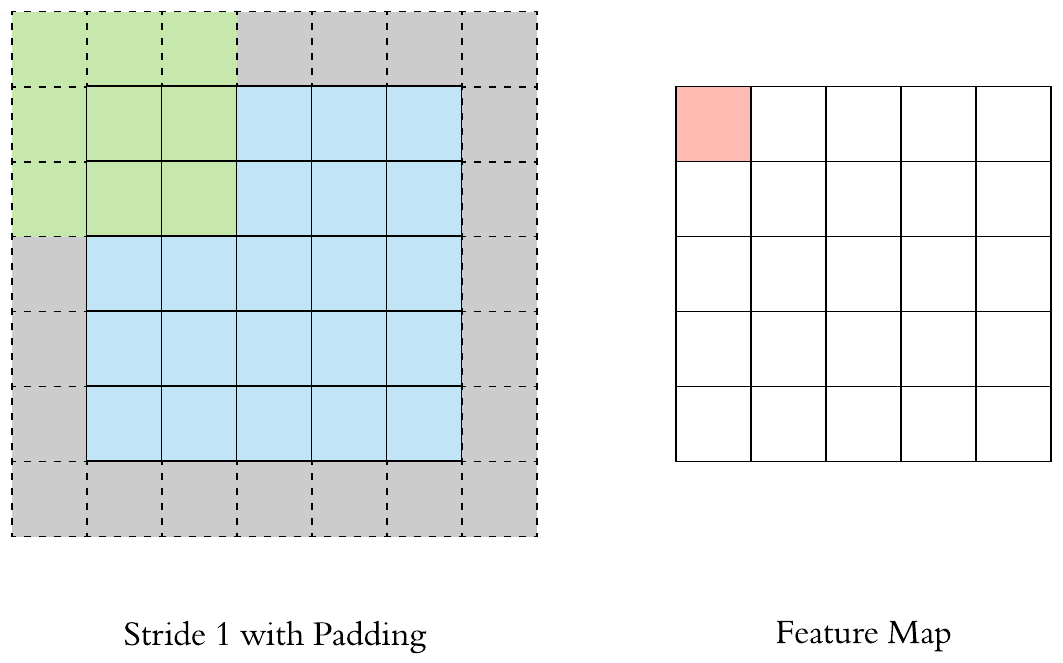

In [8]:
Image(filename='7.cnn.png')

### También anteriormente dijimos que calculamos algún número cuando tenemos una ventana sobre una parte de una imagen. Digamos que cuando vemos la primera ventana `2 x 2` calculamos un número que representa `2 x 2` parte de una imagen, este número se anota y avanzamos paso a paso (paso) uno.

### ¿Qué es este cálculo? 
Simplemente podríamos tomar los productos punto del filtro y con los píxeles de la imagen que vemos en la ventana.
Dado que tenemos una imagen RGB con profundidad 3 y tamaño de imagen de `32 x 32`. Y dado un tamaño de ventana de `5 x 5`, la ventana/filtro se convierte en una matriz `5 x 5 x 3` y simplemente tomamos un producto de punto.

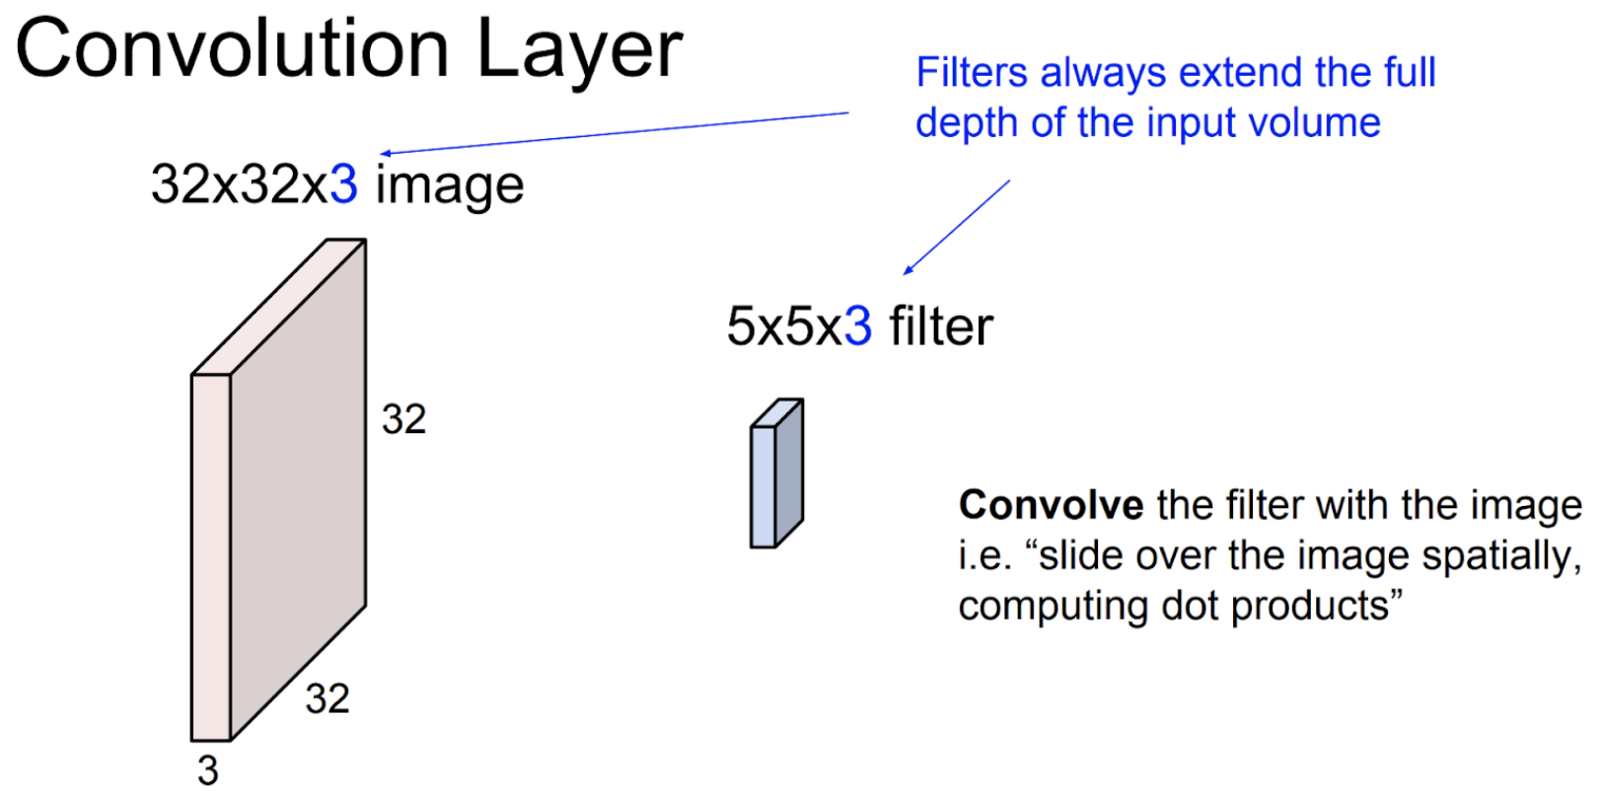

In [9]:
Image(filename='10.cnn.png')

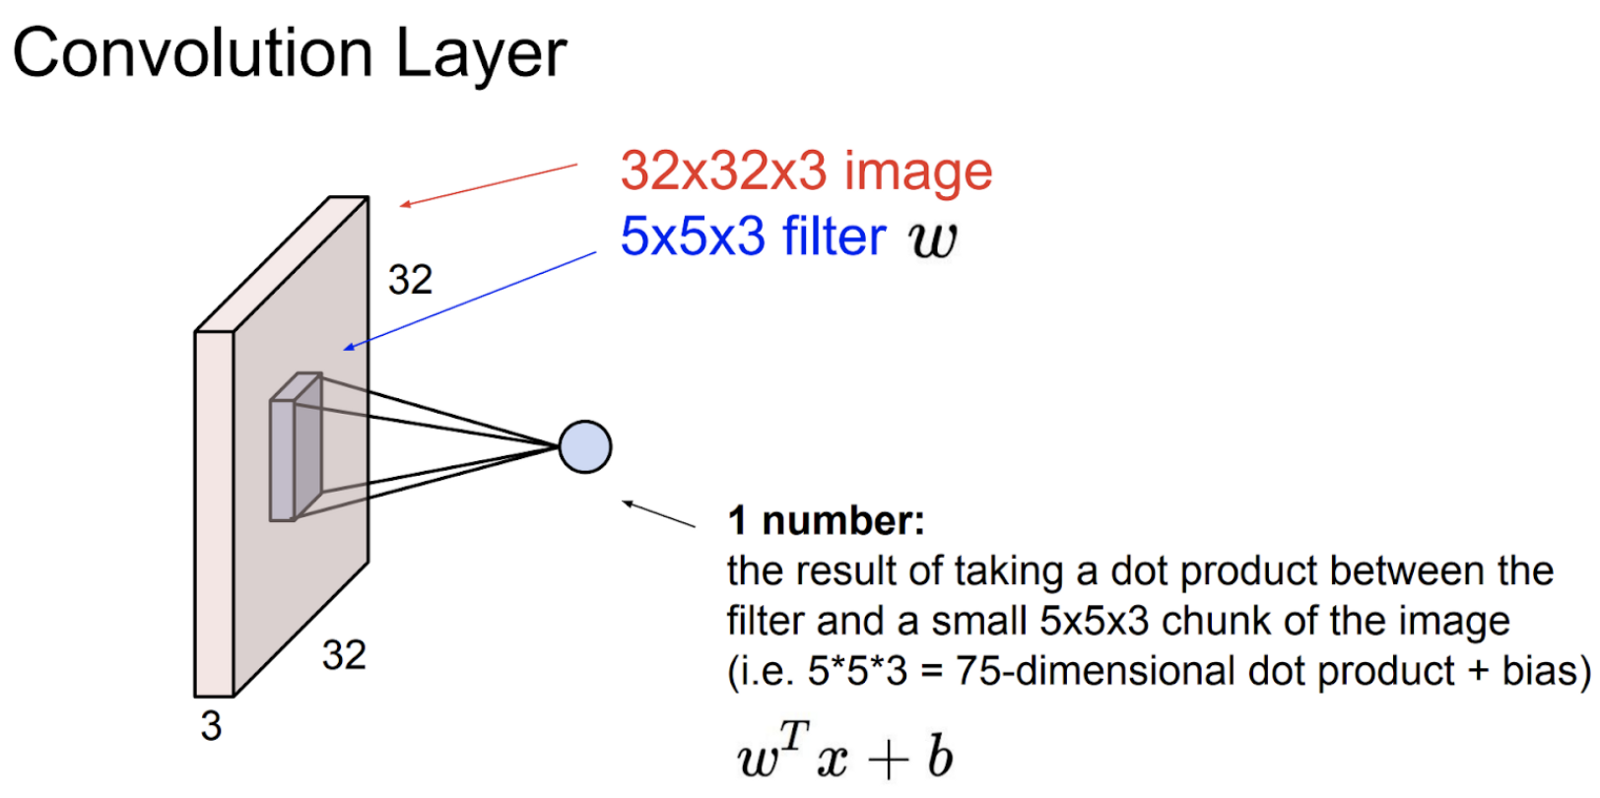

In [10]:
Image(filename='11.cnn.png')

Estos productos punto crean una salida llamada `mapa de activación.` Distintos tipos de filtros nos darán distintos mapas de activación. `La magia de las CNN es que el modelo aprenda los mejores filtros que maximicen el rendimiento del mismo.`

## `Si, si... los filtros son parámetros del modelo, nosotros podemos elegir su tamaño, pero así como usabamos el descenso por gradiente para encontrar los mejores parámetros de un perceptrón, ahora tenemos que encontrar los mejores coeficientes de los filtros.`

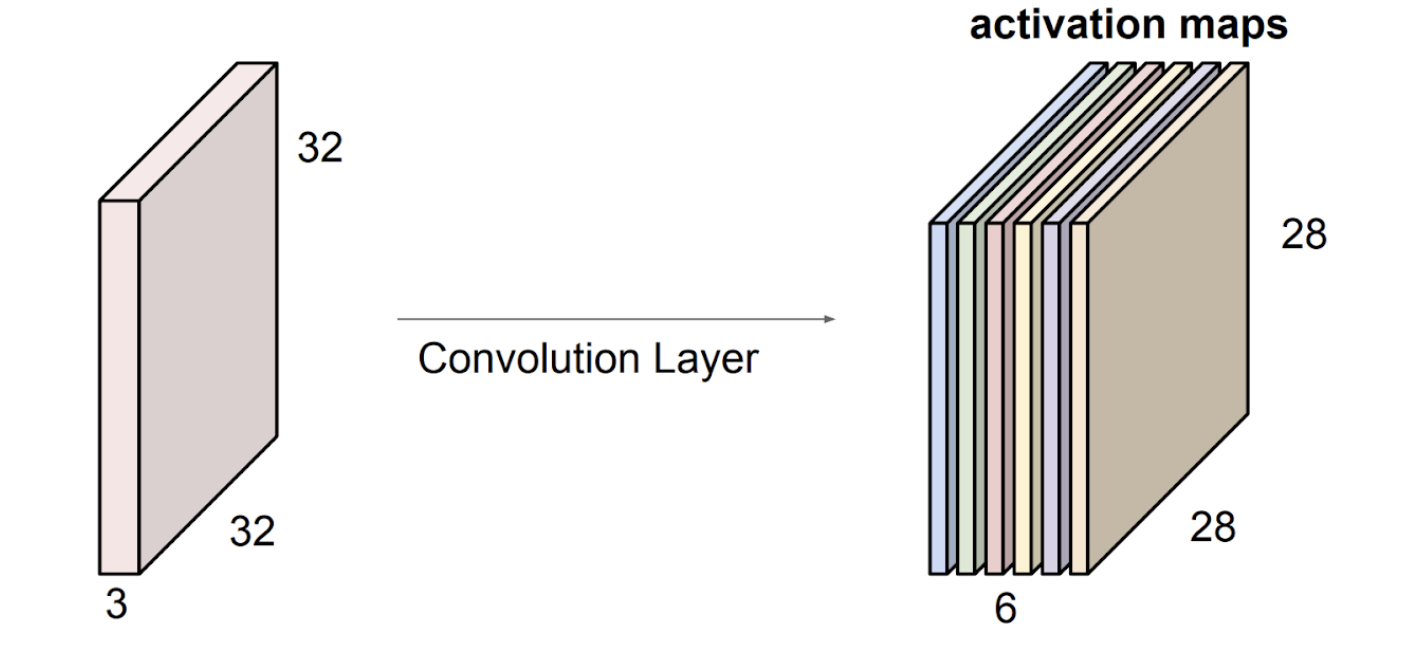

In [11]:
Image(filename='12.cnn.png')

### `Digamos que tenemos suficiente información de nuestro proceso de convolución. Para usar la información de la convolución, usamos una técnica llamada agrupación o pooling.`

### ¿Qué es la agrupación? 
Una agrupación no es más que reducir la información del mapa de activación y esto se hace de manera similar, como cuando movimos la ventana sobre la imagen para obtener el mapa de activación en primer lugar. Los cálculos realizados aquí son fundamentalmente diferentes, el más común es la agrupación máxima. 

#### ¿Qué es la agrupación máxima? 
Solo se selecciona el valor máximo del número en la ventana.

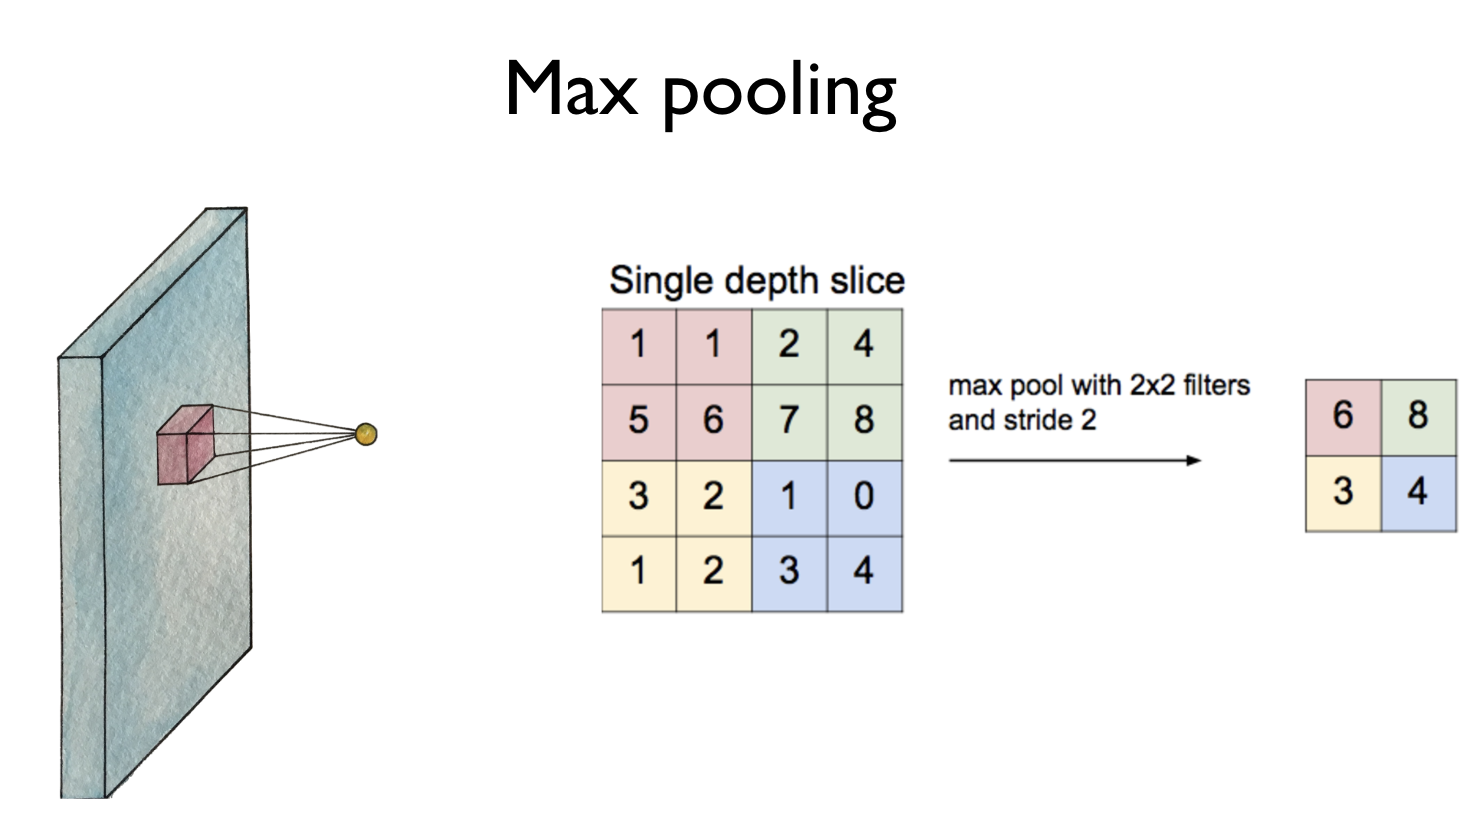

In [12]:
Image(filename='13.cnn.png')

### Luego podemos apilar varias convoluciones de manera similar a lo que hemos hecho en las clases anteriores (redes neuronales). Sin embargo, la salida final de todas las convoluciones se la debe conectar a una capa lineal (también llamada capa `completamente conectada`).

`Comenzamos con una imagen completa de CNN e introducimos todas sus partes. Cuando volvemos a unir todas las partes, obtenemos nuevamente la imagen completa de una CNN.`

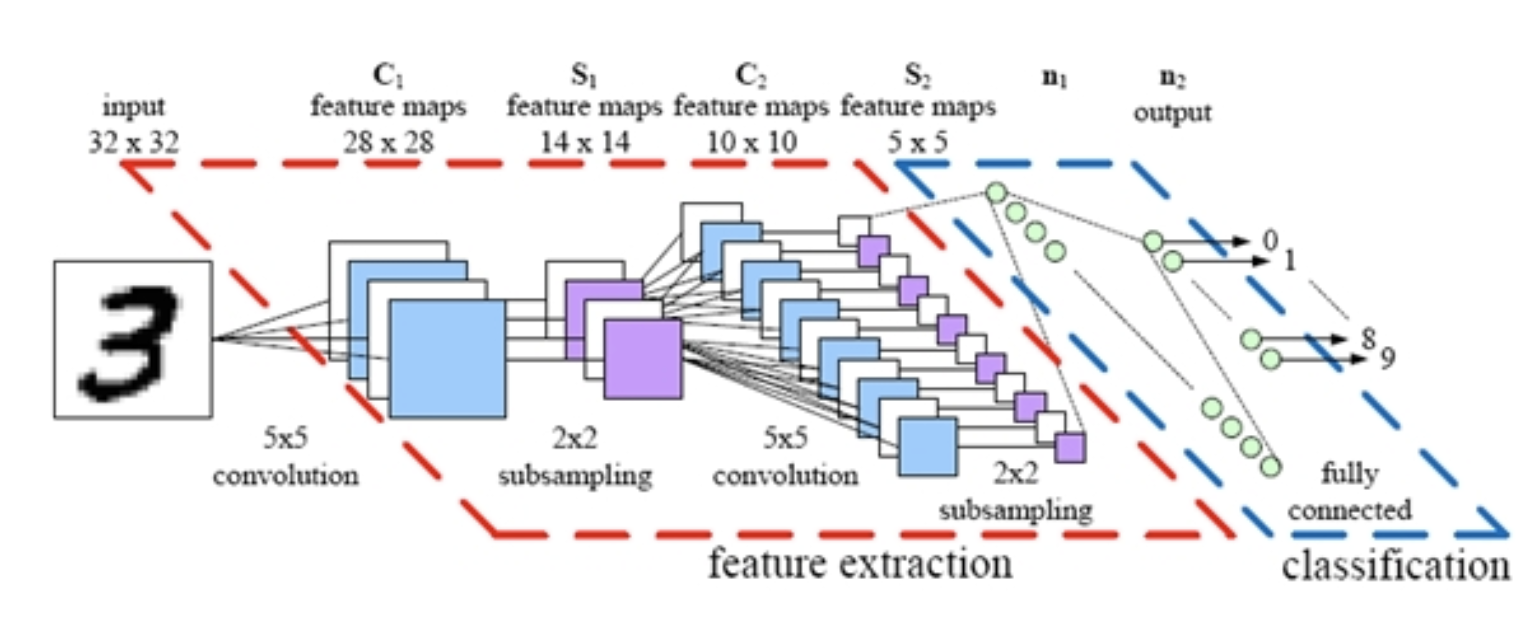

In [13]:
Image(filename='16.cnn.png')

---
# Un poco de código

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1', 
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2), name='maxpool_1'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'))
model.add(MaxPooling2D((2, 2), name='maxpool_2'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'))
model.add(MaxPooling2D((2, 2), name='maxpool_3'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_4'))
model.add(MaxPooling2D((2, 2), name='maxpool_4'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', name='dense_1'))
model.add(Dense(128, activation='relu', name='dense_2'))
model.add(Dense(1, activation='sigmoid', name='output'))

Estructuralmente, el código se parece al ANN de la siguiente imagen:

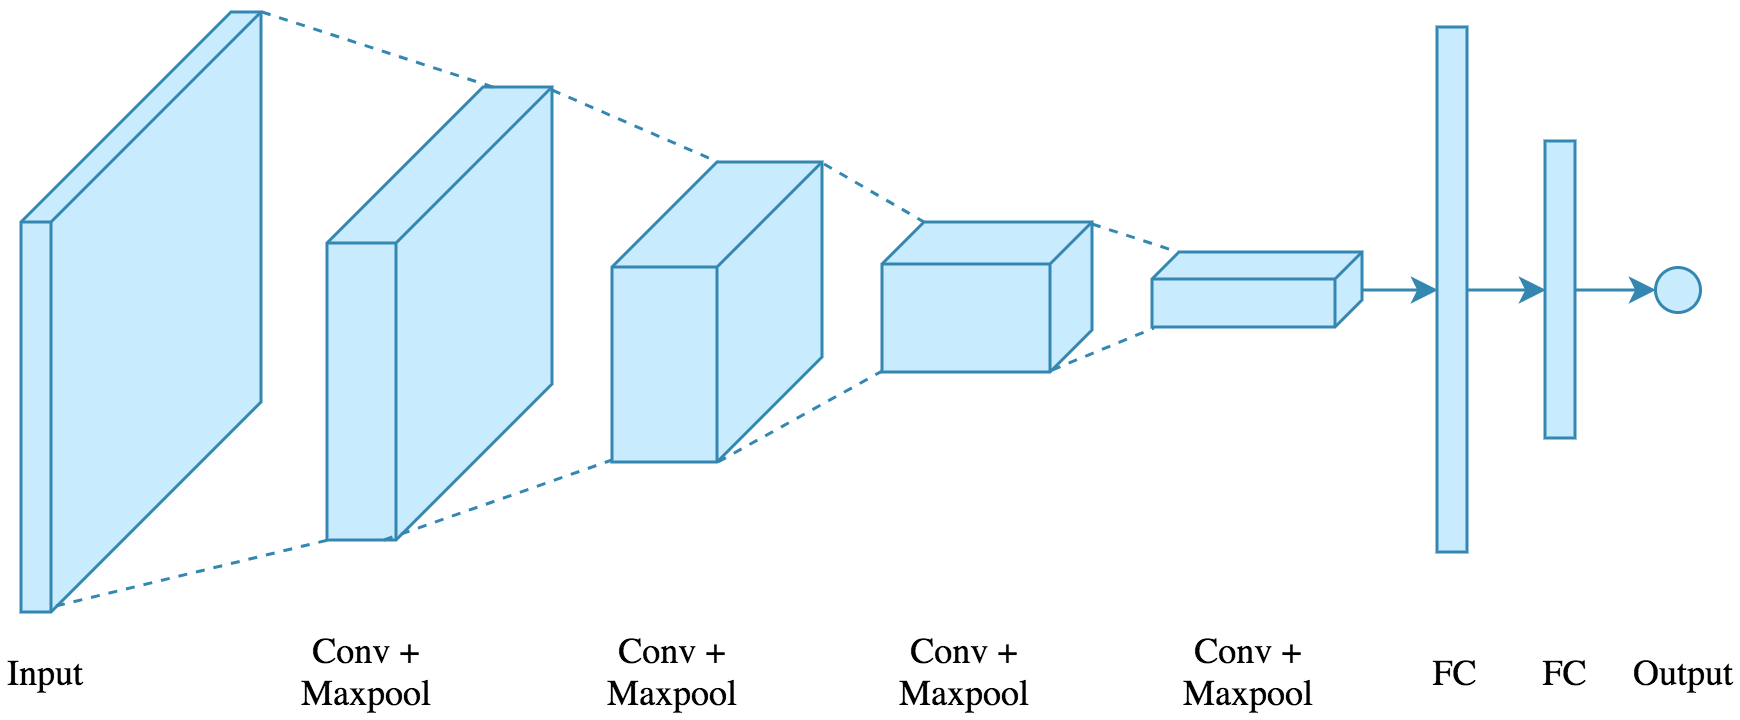

In [14]:
Image(filename='codigo.png')

#### `Conv2D`
Este método crea una capa convolucional. El primer parámetro es el recuento de filtros, y el segundo es el tamaño del filtro. Por ejemplo, en la primera capa de convolución creamos 32 filtros de tamaño 3x3. Usamos relu no linealidad como activación. También habilitamos el padding. En Keras hay dos opciones para el padding: igual o válido. 

#### `Stride`
Es 1 para las capas de convolución de forma predeterminada, por lo que no cambiamos eso. Esta capa se puede personalizar aún más con parámetros adicionales.

#### `Flatten`
Aplana la salida de las capas convolucionales para poder insertarlas en la entrada de la red completamente conectada. Funciona como una especie de reshape.

#### `MaxPooling2D` 
Crea una capa de maxpooling, el único argumento es el tamaño de la ventana. Usamos una ventana de 2x2 ya que es la más común. De forma predeterminada, la longitud del stride es igual al tamaño de la ventana, que es 2 en nuestro caso, por lo que no cambiamos eso.

#### `Dropout`
Apagamos y prendemos neuronas de manera aleatoria para evitar el overfitting.

---
### `Para mayor detalle, en el Trello les dejé varias presentaciones sobre el tema. Si alguien quiere meterse más, me escribe y les paso material.`

`Atte. La conserjería.`